# Analysis of Simulated Data

<!-- ## Package Installation

Make sure to install auto4dstem from source:

```bash
pip install auto4dstem
``` -->

## Importing Required Packages

In [2]:
%load_ext autoreload
%autoreload 2

import os
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

from cmcrameri import cm
from auto4dstem.nn.Train_Function import Train
from auto4dstem.masks.masks import Mask
from auto4dstem.viz.diffraction import display_diffraction_image, display_noisy_diffraction
from auto4dstem.viz.simulated_4DSTEM import VisualizeSimulation
from auto4dstem.viz.viz import (
    PlotStyleClass,
    visual_performance_plot,
)
from m3util.util.IO import download_files_from_txt

## GPU Settings

The notebook is designed to run on a system with a GPU accelerator this code will check is a GPU is available. 

In [3]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch
NVML library version: 570.153


Selects the GPU device to use. 

In [4]:
# you can change the device number to the one you want to use
device_number = 0

device = torch.device(f"cuda:{device_number}" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device) 
print("Current CUDA device index:", torch.cuda.current_device())

Current CUDA device index: 0


/home/jca92/anaconda3/envs/shuyu-paper/lib/python3.11/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Visualization Format 

Set the format for standard plotting throughout the notebook

In [5]:
plot_style = PlotStyleClass()
plot_style.apply_global_style()

## Download Data and Pre-Trained Models

In [6]:
data_path = os.path.abspath('./data/simulated_4dstem/')
file_download = f"{data_path}/simulated_data_urls.txt"

# check where are you from the root path
download_files_from_txt(file_download, data_path)

  0%|          | 0/72 [00:00<?, ?it/s]

  1%|▏         | 1/72 [00:00<00:29,  2.38it/s]

File already exists: 40percent_noisy_simulated_4dstem_pretrained_weights.pkl


  3%|▎         | 2/72 [00:00<00:28,  2.48it/s]

File already exists: 45percent_noisy_simulated_4dstem_pretrained_weights.pkl


  4%|▍         | 3/72 [00:01<00:27,  2.50it/s]

File already exists: 60Percent_pretrained_rotation.npy


  6%|▌         | 4/72 [00:01<00:27,  2.46it/s]

File already exists: analysis_bg50per_1e5counts__strain.h5


  7%|▋         | 5/72 [00:02<00:27,  2.41it/s]

File already exists: 25percent_noisy_simulated_4dstem_pretrained_weights.pkl


  8%|▊         | 6/72 [00:02<00:27,  2.44it/s]

File already exists: 20Percent_pretrained_rotation.npy


 10%|▉         | 7/72 [00:02<00:26,  2.44it/s]

File already exists: Label_shear_xy.npy


 11%|█         | 8/72 [00:03<00:26,  2.45it/s]

File already exists: Label_strain_yy.npy


 12%|█▎        | 9/72 [00:03<00:25,  2.44it/s]

File already exists: 25Percent_pretrained_rotation.npy


 14%|█▍        | 10/72 [00:04<00:25,  2.46it/s]

File already exists: 10percent_noisy_simulated_4dstem_pretrained_weights.pkl


 15%|█▌        | 11/72 [00:04<00:25,  2.43it/s]

File already exists: 30percent_noisy_simulated_4dstem_pretrained_weights.pkl


 17%|█▋        | 12/72 [00:04<00:24,  2.44it/s]

File already exists: analysis_bg40per_1e5counts__strain.h5


 18%|█▊        | 13/72 [00:05<00:24,  2.42it/s]

File already exists: 05percent_noisy_simulated_4dstem_pretrained_weights.pkl


 19%|█▉        | 14/72 [00:05<00:23,  2.44it/s]

File already exists: 70percent_noisy_simulated_4dstem_pretrained_weights.pkl


 21%|██        | 15/72 [00:06<00:23,  2.45it/s]

File already exists: analysis_bg45per_1e5counts__strain.h5


 22%|██▏       | 16/72 [00:06<00:26,  2.08it/s]

File already exists: 00percent_noisy_simulated_4dstem_pretrained_weights.pkl


 24%|██▎       | 17/72 [00:07<00:25,  2.19it/s]

File already exists: 60percent_noisy_simulated_4dstem_pretrained_weights.pkl


 25%|██▌       | 18/72 [00:07<00:29,  1.85it/s]

File already exists: 35percent_noisy_simulated_4dstem_pretrained_weights.pkl


 26%|██▋       | 19/72 [00:08<00:26,  2.00it/s]

File already exists: 00Percent_pretrained_rotation.npy


 28%|██▊       | 20/72 [00:08<00:24,  2.13it/s]

File already exists: analysis_bg20per_1e5counts__strain.h5


 29%|██▉       | 21/72 [00:09<00:22,  2.23it/s]

File already exists: 20percent_noisy_simulated_4dstem_pretrained_weights.pkl


 31%|███       | 22/72 [00:09<00:22,  2.27it/s]

File already exists: 50percent_noisy_simulated_4dstem_pretrained_weights.pkl


 32%|███▏      | 23/72 [00:09<00:21,  2.32it/s]

File already exists: analysis_bg60per_1e5counts__strain.h5


 33%|███▎      | 24/72 [00:10<00:20,  2.38it/s]

File already exists: analysis_bg70per_1e5counts__strain.h5


 35%|███▍      | 25/72 [00:10<00:19,  2.42it/s]

File already exists: 70Percent_pretrained_rotation.npy


 36%|███▌      | 26/72 [00:11<00:18,  2.44it/s]

File already exists: 45Percent_pretrained_rotation.npy


 38%|███▊      | 27/72 [00:11<00:18,  2.45it/s]

File already exists: analysis_bg05per_1e5counts__strain.h5


 39%|███▉      | 28/72 [00:11<00:18,  2.42it/s]

File already exists: analysis_bg15per_1e5counts__strain.h5


 40%|████      | 29/72 [00:12<00:17,  2.46it/s]

File already exists: 15Percent_pretrained_rotation.npy


 42%|████▏     | 30/72 [00:12<00:16,  2.48it/s]

File already exists: analysis_bg00per_1e5counts__strain.h5


 43%|████▎     | 31/72 [00:13<00:16,  2.48it/s]

File already exists: analysis_bg30per_1e5counts__strain.h5


 44%|████▍     | 32/72 [00:13<00:16,  2.44it/s]

File already exists: analysis_bg25per_1e5counts__strain.h5


 46%|████▌     | 33/72 [00:14<00:15,  2.45it/s]

File already exists: Label_rotation.npy


 47%|████▋     | 34/72 [00:14<00:15,  2.47it/s]

File already exists: 15percent_noisy_simulated_4dstem_pretrained_weights.pkl


 49%|████▊     | 35/72 [00:14<00:14,  2.47it/s]

File already exists: 10Percent_pretrained_rotation.npy


 50%|█████     | 36/72 [00:15<00:14,  2.45it/s]

File already exists: 40Percent_pretrained_rotation.npy


 51%|█████▏    | 37/72 [00:15<00:14,  2.47it/s]

File already exists: 30Percent_pretrained_rotation.npy


 53%|█████▎    | 38/72 [00:16<00:13,  2.47it/s]

File already exists: 05Percent_pretrained_rotation.npy


 54%|█████▍    | 39/72 [00:16<00:13,  2.48it/s]

File already exists: 35Percent_pretrained_rotation.npy


 56%|█████▌    | 40/72 [00:16<00:13,  2.44it/s]

File already exists: analysis_bg10per_1e5counts__strain.h5


 57%|█████▋    | 41/72 [00:17<00:12,  2.44it/s]

File already exists: 50Percent_pretrained_rotation.npy


 58%|█████▊    | 42/72 [00:17<00:12,  2.36it/s]

File already exists: analysis_bg35per_1e5counts__strain.h5


 60%|█████▉    | 43/72 [00:18<00:12,  2.39it/s]

File already exists: Label_strain_xx.npy


 61%|██████    | 44/72 [00:18<00:11,  2.43it/s]

File already exists: 45Per_2_train_process_scale_shear.npy


 62%|██████▎   | 45/72 [00:18<00:10,  2.45it/s]

File already exists: 60Per_2_train_process_scale_shear.npy


 64%|██████▍   | 46/72 [00:19<00:10,  2.45it/s]

File already exists: 30Per_2_train_process_scale_shear.npy


 65%|██████▌   | 47/72 [00:19<00:10,  2.46it/s]

File already exists: 40Per_2_train_process_rotation.npy


 67%|██████▋   | 48/72 [00:20<00:09,  2.48it/s]

File already exists: 10Per_2_train_process_scale_shear.npy


 68%|██████▊   | 49/72 [00:20<00:09,  2.47it/s]

File already exists: 20Per_2_train_process_scale_shear.npy


 69%|██████▉   | 50/72 [00:20<00:08,  2.46it/s]

File already exists: 30Per_2_train_process_rotation.npy


 71%|███████   | 51/72 [00:21<00:08,  2.46it/s]

File already exists: 05Per_2_train_process_scale_shear.npy


 72%|███████▏  | 52/72 [00:21<00:08,  2.47it/s]

File already exists: 05Per_2_train_process_rotation.npy


 74%|███████▎  | 53/72 [00:22<00:07,  2.48it/s]

File already exists: 25Per_2_train_process_rotation.npy


 75%|███████▌  | 54/72 [00:22<00:07,  2.47it/s]

File already exists: 45Per_2_train_process_rotation.npy


 76%|███████▋  | 55/72 [00:22<00:06,  2.45it/s]

File already exists: 35Per_2_train_process_scale_shear.npy


 78%|███████▊  | 56/72 [00:23<00:06,  2.45it/s]

File already exists: 50Per_2_train_process_scale_shear.npy


 79%|███████▉  | 57/72 [00:23<00:06,  2.44it/s]

File already exists: 70Per_2_train_process_scale_shear.npy


 81%|████████  | 58/72 [00:24<00:05,  2.45it/s]

File already exists: 00Per_2_train_process_rotation.npy


 82%|████████▏ | 59/72 [00:24<00:05,  2.45it/s]

File already exists: 10Per_2_train_process_rotation.npy


 83%|████████▎ | 60/72 [00:25<00:04,  2.46it/s]

File already exists: 00Per_2_train_process_scale_shear.npy


 85%|████████▍ | 61/72 [00:25<00:04,  2.46it/s]

File already exists: 20Per_2_train_process_rotation.npy


 86%|████████▌ | 62/72 [00:25<00:04,  2.48it/s]

File already exists: 15Per_2_train_process_rotation.npy


 88%|████████▊ | 63/72 [00:26<00:03,  2.49it/s]

File already exists: 35Per_2_train_process_rotation.npy


 89%|████████▉ | 64/72 [00:26<00:03,  2.47it/s]

File already exists: 15Per_2_train_process_scale_shear.npy


 90%|█████████ | 65/72 [00:27<00:02,  2.47it/s]

File already exists: 25Per_2_train_process_scale_shear.npy


 92%|█████████▏| 66/72 [00:27<00:02,  2.47it/s]

File already exists: 40Per_2_train_process_scale_shear.npy
Rate limit reached, waiting to retry...
Rate limit reached, waiting to retry...
Rate limit reached, waiting to retry...
Rate limit reached, waiting to retry...
Rate limit reached, waiting to retry...


 93%|█████████▎| 67/72 [01:00<00:51, 10.20s/it]

File already exists: 50Per_2_train_process_rotation.npy


 94%|█████████▍| 68/72 [01:00<00:29,  7.27s/it]

File already exists: 60Per_2_train_process_rotation.npy


 96%|█████████▌| 69/72 [01:01<00:15,  5.21s/it]

File already exists: 70Per_2_train_process_rotation.npy


 97%|█████████▋| 70/72 [01:01<00:07,  3.77s/it]

File already exists: simulated_4dstem_grain_index.npy


 99%|█████████▊| 71/72 [01:02<00:02,  2.76s/it]

File already exists: MAE_list_simulated_4dstem.pickle


100%|██████████| 72/72 [01:02<00:00,  1.15it/s]

File already exists: polycrystal_output4D.mat


## Learning Crystallographic Rotation

The first step is to learn the course crystallographic rotation of the data. To do this, we apply a ring mask to the data to calculate the loss in the region of interest where there are diffraction spots. This avoids the central region where there is no diffraction spot - and limited information regarding the crystal structure and strain. 



### Construct Circular Mask

We build a ring mask with inner radius 50 and outer radius 85, to only calculate the loss in the region of interest where there are diffraction spots. 

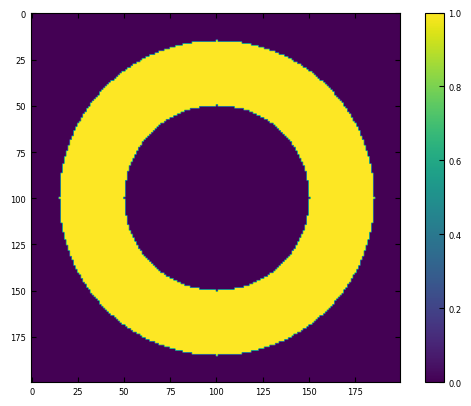

In [7]:
# set mask class
set_mask = Mask()

# generate mask
mask_tensor, mask_list = set_mask.mask_ring(radius_1=50, radius_2=85)

plt.imshow(mask_tensor)
plt.colorbar()
plt.show()

```{figure} 
:name: Circular_Mask

Figure 1: Visualization of the generated mask tensor using a circular mask with inner radius 50 and outer radius 85.
```

## Benchmark Simulated 4DSTEM Dataset

### Set Parameters

Sets the initial Background level (BKG level), Load Data and Pre-Trained Weights

In [8]:
background_intensity = 0
background_string = format(int(background_intensity * 100), "02d")
data_file = os.path.abspath(f"{data_path}/polycrystal_output4D.mat")
rotation_path = f"{data_path}/{background_string}Percent_pretrained_rotation.npy"

## Initialize Training Class

This initializes the training class with the given parameters, and loads the data. 

In [11]:
trainer = Train(
    data_file=data_file,
    device=device,
    coarse_learned_angle_adjustment=0,
    transpose=(1, 0, 3, 2),
    background_weight=background_intensity,
    learned_rotation=rotation_path,
    num_base=1,
    upsample_dimensions=800,
    scale_threshold=0.05,
    shear_threshold=0.1,
    rotation_threshold=0.1,
    translation_threshold=0.15,
    learnable_mask_intensity=0,
    dynamic_mask_to_loss_function=mask_list,
    initial_mask=None,
    interpolate_flag=True,
    reverse_affine_transform_flag=False,
    folder_path=data_path,
)

100%|██████████| 65536/65536 [00:00<00:00, 299402.90it/s]


### Random Diffraction Image

Visualization of a random diffraction image from the dataset.

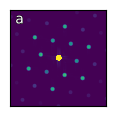

In [22]:
data = trainer.raw_data(index=0)
display_diffraction_image(data, clim=[0, 4e-5])

```{figure} 
:name: Circular_Mask

**Figure 2**: Random diffraction image from 4D-STEM
```

/home/shuyu/4DSTEM/Simulated_4dstem/Extremely_Noisy_4DSTEM_Strain_Mapping_Using_CC_ST_AE_Simulated/figures/Simulated_generated_[0, 0.25, 0.6]_noise.png
/home/shuyu/4DSTEM/Simulated_4dstem/Extremely_Noisy_4DSTEM_Strain_Mapping_Using_CC_ST_AE_Simulated/figures/Simulated_generated_[0, 0.25, 0.6]_noise.svg


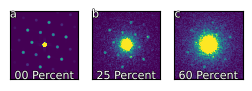

In [11]:
display_noisy_diffraction(data,
    folder_path=os.path.join(folder_path, "figures/"),
    noise_level=[0, 0.25, 0.6],
)

**Figure 2:** Diffraction image with various Poisson distributed noise intensity. a) Raw data. b) 10% noise. c) 25% noise. d) 45% noise. e) 60% noise intensity.

## Load Trained Neural Network

Training the Neural Network takes at least 12 to 24 hours with an A100 GPU. Thus we provide pretrained weights with fixed seeds for reproducibility.

In [12]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path, map_weight = True)

kwargs dict_keys([])


/home/shuyu/4DSTEM/Auto4DSTEM/src/auto4dstem/nn/CC_ST_AE/encoder.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_mask = torch.tensor(
/home/shuyu/4DSTEM/Auto4DSTEM/src/auto4dstem/nn/CC_ST_AE/encoder.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_mask = torch.tensor(temp_mask.squeeze(), dtype=torch.bool)


## Evalutate the Model

In [13]:
# set batch size and load dataset into DataLoader
trainer.batch_size = 256
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

/home/shuyu/4DSTEM/Auto4DSTEM/src/auto4dstem/nn/Train_Function.py:565: UserWarning: Training the model requires access to a GPU, it takes approximately 15 minutes for an A6000 GPU 
 Alternatively, you can use the pre-trained model provided in the repository.
  warnings.warn("Training the model requires access to a GPU, it takes approximately 15 minutes for an A6000 GPU \n Alternatively, you can use the pre-trained model provided in the repository.")
  0%|                                                                                                                                           | 0/256 [00:00<?, ?it/s]/home/shuyu/.conda/envs/HAWQ/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/home/shuyu/.conda/envs/HAWQ/lib/python3.11/site-packages/torch/nn/functional.py:4377: UserWarning: Default grid_sample and 

## Initialize visual result class 

### Set hyperparameters of the class

In [14]:
background_intensity = 0
background_string = format(int(background_intensity * 100), "02d")

rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"

noise_free_rotation = np.load(rotation_path)
noise_free_strain = np.load(strain_path)

### Create class and visualize rotation result

./data/figures
./data/figures/Rotation_comparison_on_0.00 Background Noise.png
./data/figures/Rotation_comparison_on_0.00 Background Noise.svg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:01<00:00, 60616.24it/s]


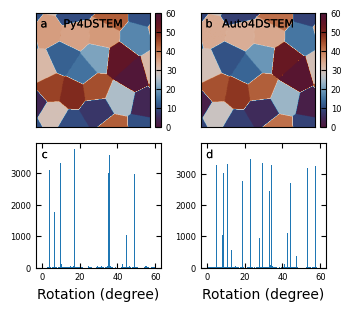

In [15]:
visual = VisualizeSimulation(
    rotation=noise_free_rotation,
    scale_shear=noise_free_strain,
    file_py4DSTEM=file_py4DSTEM,
    label_rotation_path=folder_path + "/Label_rotation.npy",
    label_xx_path=folder_path + "/Label_strain_xx.npy",
    label_yy_path=folder_path + "/Label_strain_yy.npy",
    label_xy_path=folder_path + "/Label_shear_xy.npy",
    cmap_rotation=cm.vikO,
    cmap_strain=cm.vik,
    cmap_mae=cm.vik,
    noise_intensity=0,
    angle_shift=25,
    strain_diff_range=[-0.03, 0.03],
    strain_rotation_range=[-40, 30],
    mae_diff_range=[-0.006, 0.006],
    mae_rotation_range=[-0.5, 0.5],
    label_style="b",
)

### Visualize label map

./data/figures/Strain_Map_of_Label.png
./data/figures/Strain_Map_of_Label.svg


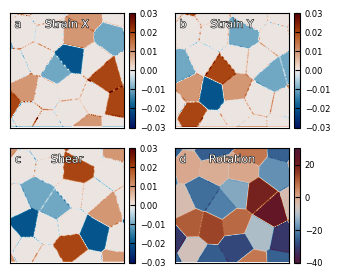

In [16]:
visual.visual_label_map(cmap_strain=cm.vik, cmap_rotation=cm.vikO, label_style="wb",inset_fraction=(0.1,0.07))

### Visualize strain map result

./data/figures/Strain_Map_0.00_Background_Noise.png
./data/figures/Strain_Map_0.00_Background_Noise.svg


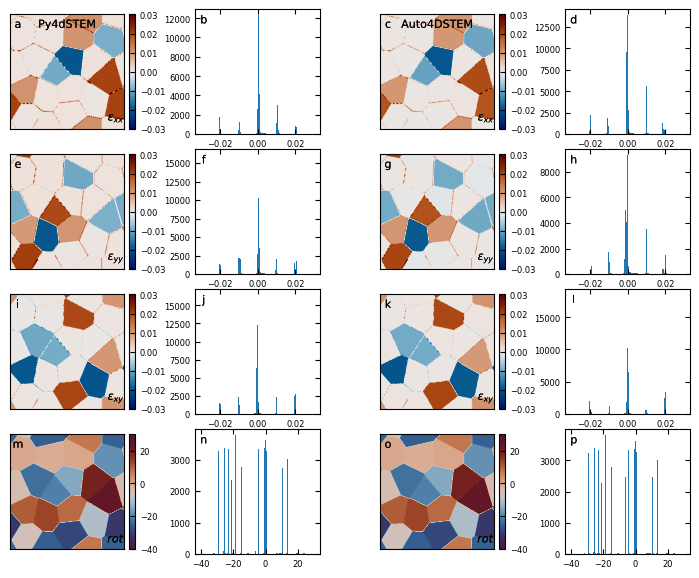

In [17]:
visual.visual_strain(inset_fraction = (0.09,0.07))

### Visualize MAE comparison 

./data/figures/Performance_Comparison_0.00Percent_BKG.png
./data/figures/Performance_Comparison_0.00Percent_BKG.svg


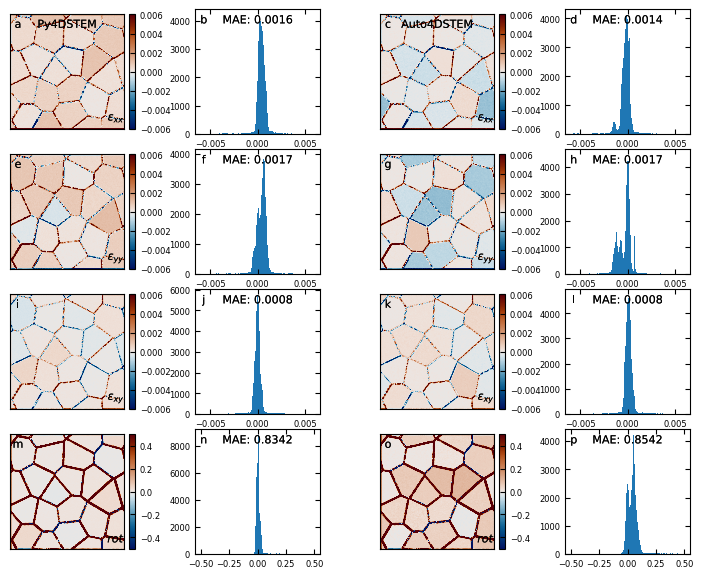

In [18]:
visual.visual_diff()

In [19]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [20]:
visual.add_data_2_plot()

# 05% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [21]:
background_intensity = 0.05
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

## Update train class parameter for data generating 

In [22]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = 0

## Generate dataset

In [23]:
trainer.load_data()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:00<00:00, 204623.04it/s]


## Load pretrained weight to neural network

In [24]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path, map_weight = True)

kwargs dict_keys([])


/home/shuyu/4DSTEM/Auto4DSTEM/src/auto4dstem/nn/CC_ST_AE/encoder.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_mask = torch.tensor(
/home/shuyu/4DSTEM/Auto4DSTEM/src/auto4dstem/nn/CC_ST_AE/encoder.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_mask = torch.tensor(temp_mask.squeeze(), dtype=torch.bool)


In [25]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

/home/shuyu/4DSTEM/Auto4DSTEM/src/auto4dstem/nn/Train_Function.py:565: UserWarning: Training the model requires access to a GPU, it takes approximately 8 minutes for an A6000 GPU 
 Alternatively, you can use the pre-trained model provided in the repository.
  warnings.warn("Training the model requires access to a GPU, it takes approximately 15 minutes for an A6000 GPU \n Alternatively, you can use the pre-trained model provided in the repository.")
  0%|                                                                                                                                           | 0/256 [00:00<?, ?it/s]/home/shuyu/.conda/envs/HAWQ/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/home/shuyu/.conda/envs/HAWQ/lib/python3.11/site-packages/torch/nn/functional.py:4377: UserWarning: Default grid_sample and a

## Update visual result class
### Set hyper parameters of the class

In [26]:
background_intensity = 0.05
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_5per = np.load(rotation_path)
scale_shear_5per = np.load(strain_path)

### Load variable into visualization class

In [27]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_5per
visual.scale_shear = scale_shear_5per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [28]:
visual.reset_baseline()

### Shift angle to compare appropriately

./data/figures
./data/figures/Rotation_comparison_on_0.05 Background Noise.png
./data/figures/Rotation_comparison_on_0.05 Background Noise.svg


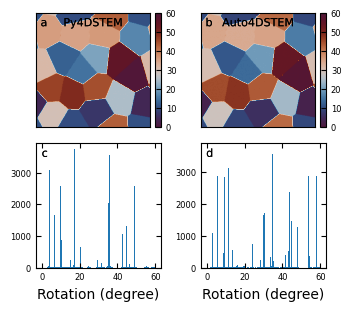

In [29]:
visual.reset_angle(angle_shift=-7)

### Update polar decomposition based on new affine matrix

In [30]:
visual.reset_polar_matrix()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:01<00:00, 60180.39it/s]


### Visualize strain map result

./data/figures/Strain_Map_0.05_Background_Noise.png
./data/figures/Strain_Map_0.05_Background_Noise.svg


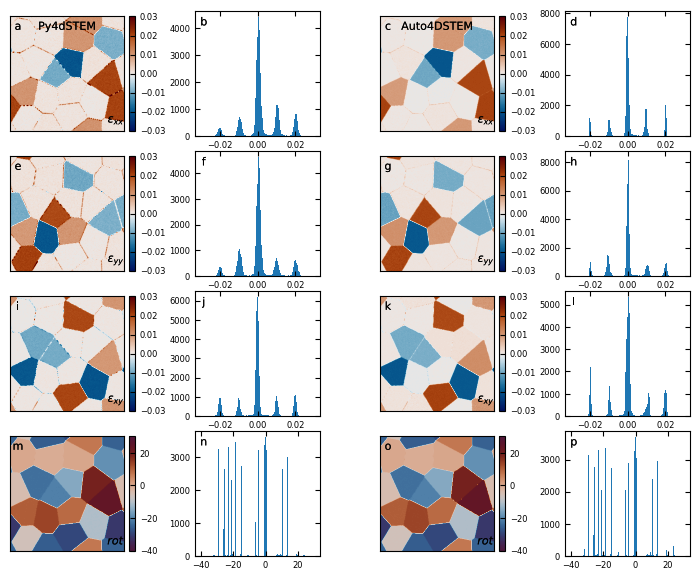

In [31]:
visual.visual_strain()

### Visualize MAE comparison

./data/figures/Performance_Comparison_0.05Percent_BKG.png
./data/figures/Performance_Comparison_0.05Percent_BKG.svg


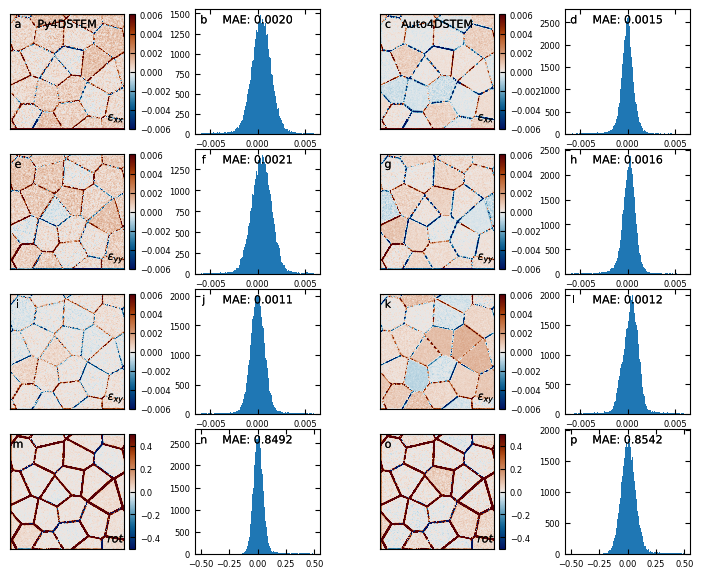

In [32]:
visual.visual_diff()

In [33]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [34]:
visual.add_data_2_plot()

# 10% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [35]:
background_intensity = 0.10
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [36]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -25

## Generate dataset

In [37]:
trainer.load_data()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:00<00:00, 1452958.25it/s]


## Load pretrained weight to neural network

In [38]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

kwargs dict_keys([])


In [39]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [07:06<00:00,  1.67s/it]


## Update visual result class
### Set hyper parameters of the class

In [40]:
background_intensity = 0.10
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_10per = np.load(rotation_path)
scale_shear_10per = np.load(strain_path)

### Load variable into visualization class

In [41]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_10per
visual.scale_shear = scale_shear_10per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [42]:
visual.reset_baseline()

### Shift angle to compare appropriately

./data/figures
./data/figures/Rotation_comparison_on_0.10 Background Noise.png
./data/figures/Rotation_comparison_on_0.10 Background Noise.svg


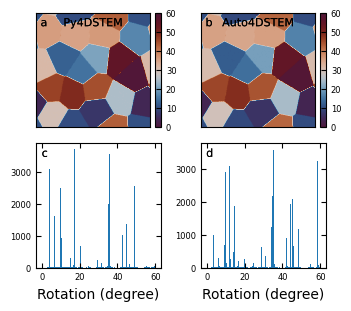

In [43]:
visual.reset_angle(angle_shift=-5)

### Update polar decomposition based on new affine matrix

In [44]:
visual.reset_polar_matrix()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:01<00:00, 61178.64it/s]


### Visualize strain result

./data/figures/Strain_Map_0.10_Background_Noise.png
./data/figures/Strain_Map_0.10_Background_Noise.svg


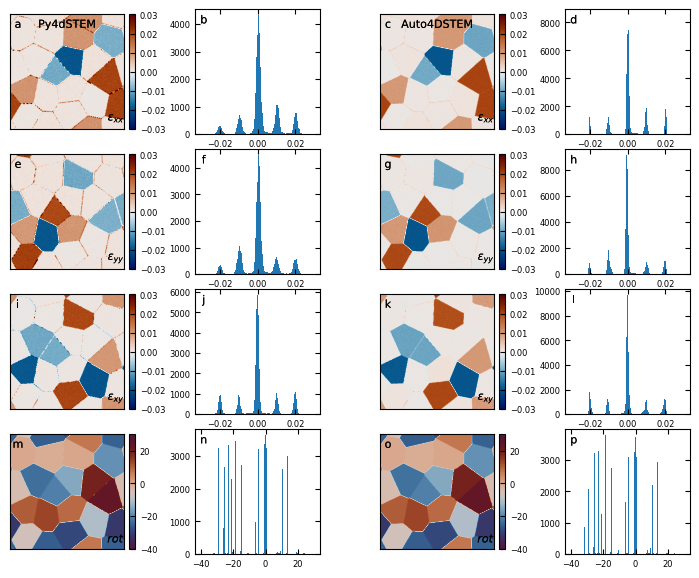

In [45]:
visual.visual_strain()

### visualize MAE comparison

./data/figures/Performance_Comparison_0.10Percent_BKG.png
./data/figures/Performance_Comparison_0.10Percent_BKG.svg


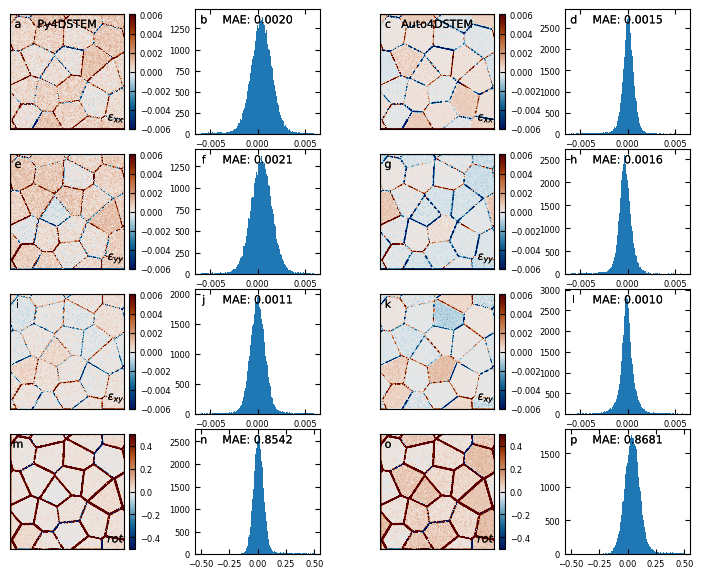

In [46]:
visual.visual_diff()

In [40]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [41]:
visual.add_data_2_plot()

# 15% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [53]:
background_intensity = 0.15
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [54]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = 0

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [56]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [42]:
background_intensity = 0.15
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_15per = np.load(rotation_path)
scale_shear_15per = np.load(strain_path)

### Load variable into visualization class

In [43]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_15per
visual.scale_shear = scale_shear_15per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [44]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-8)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [49]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [50]:
visual.add_data_2_plot()

#  20% Noisy 4D STEM 

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.20
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -20

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [51]:
background_intensity = 0.20
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_20per = np.load(rotation_path)
scale_shear_20per = np.load(strain_path)

### Load variable into visualization class

In [52]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_20per
visual.scale_shear = scale_shear_20per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [53]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-7)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [58]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [59]:
visual.add_data_2_plot()

# 25% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.25
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -15

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [60]:
background_intensity = 0.25
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_25per = np.load(rotation_path)
scale_shear_25per = np.load(strain_path)

### Load variable into visualization class

In [61]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_25per
visual.scale_shear = scale_shear_25per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [62]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-9)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [67]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [68]:
visual.add_data_2_plot()

# Visualize 30Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.30
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -30

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [69]:
background_intensity = 0.30
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_30per = np.load(rotation_path)
scale_shear_30per = np.load(strain_path)

### Load variable into visualization class

In [70]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_30per
visual.scale_shear = scale_shear_30per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [71]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-9)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [76]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [77]:
visual.add_data_2_plot()

# Visualize 35Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.35
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -5

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [78]:
background_intensity = 0.35
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_35per = np.load(rotation_path)
scale_shear_35per = np.load(strain_path)

### Load variable into visualization class

In [79]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_35per
visual.scale_shear = scale_shear_35per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [80]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-6)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [85]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [86]:
visual.add_data_2_plot()

# Visualize 40Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.40
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -25

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [87]:
background_intensity = 0.40
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_40per = np.load(rotation_path)
scale_shear_40per = np.load(strain_path)

### Load variable into visualization class

In [88]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_40per
visual.scale_shear = scale_shear_40per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [89]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-8)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [94]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [95]:
visual.add_data_2_plot()

# Visualize 45Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.45
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -40

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [96]:
background_intensity = 0.45
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_45per = np.load(rotation_path)
scale_shear_45per = np.load(strain_path)

### Load variable into visualization class

In [97]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_45per
visual.scale_shear = scale_shear_45per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [98]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-7)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [103]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [104]:
visual.add_data_2_plot()

# Visualize 50Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.50
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = -20

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [105]:
background_intensity = 0.50
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_50per = np.load(rotation_path)
scale_shear_50per = np.load(strain_path)

### Load variable into visualization class

In [106]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_50per
visual.scale_shear = scale_shear_50per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [107]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-6)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [112]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [113]:
visual.add_data_2_plot()

# Visualize 60Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.60
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = 1

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [114]:
background_intensity = 0.60
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_60per = np.load(rotation_path)
scale_shear_60per = np.load(strain_path)

### Load variable into visualization class

In [115]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_60per
visual.scale_shear = scale_shear_60per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [116]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-9)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.mae_diff_range = [-0.01, 0.01]
visual.visual_diff()

In [121]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [122]:
visual.add_data_2_plot()

# Visualize 70Percent Background

## Load pretraiend weight and rotation path

In [ ]:
background_intensity = 0.70
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Percent_pretrained_rotation.npy"

### Add extra rotation accoding to training strategy

In [ ]:
trainer.background_weight = background_intensity
trainer.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
trainer.coarse_learned_angle_adjustment = 20

## Generate dataset

In [ ]:
trainer.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = (
    f"{folder_path}/{background_string}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
)
trainer.load_pretrained_weight(weight_path,map_weight = True)

In [ ]:
trainer.predict(
    train_process="2", save_strain=True, save_rotation=True, file_name=background_intensity
)

## Update visual result class
### Set hyper parameters of the class

In [123]:
background_intensity = 0.70
background_string = format(int(background_intensity * 100), "02d")
rotation_path = f"{folder_path}/{background_string}Per_2_train_process_rotation.npy"
strain_path = f"{folder_path}/{background_string}Per_2_train_process_scale_shear.npy"
rotation_70per = np.load(rotation_path)
scale_shear_70per = np.load(strain_path)

### Load variable into visualization class

In [124]:
visual.file_py4DSTEM = f"{folder_path}/analysis_bg{background_string}per_1e5counts__strain.h5"
visual.rotation = rotation_70per
visual.scale_shear = scale_shear_70per
visual.noise_intensity = background_intensity

### Reset baseline of py4DSTEM

In [125]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-8)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.mae_diff_range = [-0.015, 0.015]
visual.visual_diff()

In [130]:
visual.record_performance(
    data_index=True,
    data_index_path=f"{folder_path}/simulated_4dstem_grain_index.npy",
    show_index_map=False,
    width=2,
)

In [131]:
visual.add_data_2_plot()

## Visualize performance of both methods

In [132]:
img_show = True
if img_show:
    %matplotlib inline
else:
    plt.ioff()

In [56]:
direct_load = True
if direct_load:
    with open(f"{folder_path}/MAE_list_simulated_4dstem.pickle", "rb") as pickle_file:
        visual.list_of_dic = pickle.load(pickle_file)

### Generate various noise level plots of both methods
### Generate Strain XX results

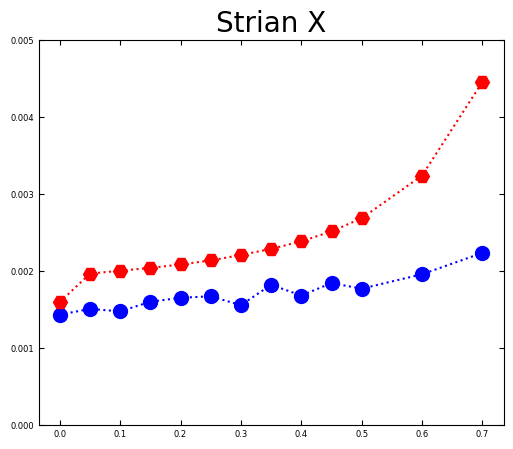

In [58]:
visual_performance_plot(
    x_list=visual.extract_ele_from_dic(0)[0],
    auto=visual.extract_ele_from_dic(4)[1],
    py4d=visual.extract_ele_from_dic(0)[1],
    #                         auto_yerr =visual.extract_ele_from_dic(12)[1],
    #                         py4d_yerr =visual.extract_ele_from_dic(8)[1],
    title="Strian X",
    xlabel="",
    ylabel="",
    # add_x = x_add,
    # add_y = fpga_xx,
    marker_list=["o", "H", "^"],
    figsize=(6, 5),
    ylim=[0, 0.005],
    fill_between=False,
    errorbar=False,
    folder_path="save_figures/",
)

### Generate Strain YY results

In [ ]:
visual_performance_plot(
    x_list=visual.extract_ele_from_dic(0)[0],
    auto=visual.extract_ele_from_dic(5)[1],
    py4d=visual.extract_ele_from_dic(1)[1],
    # auto_yerr =visual.extract_ele_from_dic(13)[1],
    # py4d_yerr =visual.extract_ele_from_dic(9)[1],
    title="Strian Y",
    xlabel="",
    ylabel="",
    # add_x = x_add,
    # add_y = fpga_yy,
    marker_list=["o", "H", "^"],
    figsize=(6, 5),
    ylim=[0, 0.005],
    fill_between=False,
    errorbar=False,
    folder_path="save_figures/",
)

### Generate Strain XY results

In [ ]:
visual_performance_plot(
    x_list=visual.extract_ele_from_dic(0)[0],
    auto=visual.extract_ele_from_dic(6)[1],
    py4d=visual.extract_ele_from_dic(2)[1],
    # auto_yerr =visual.extract_ele_from_dic(14)[1],
    # py4d_yerr =visual.extract_ele_from_dic(10)[1],
    title="Shear",
    xlabel="",
    ylabel="",
    # add_x = x_add,
    # add_y = fpga_xy,
    marker_list=["o", "H", "^"],
    figsize=(6, 5),
    ylim=[0, 0.004],
    fill_between=False,
    errorbar=False,
    folder_path="save_figures/",
)

### Generate Rotation results

In [ ]:
visual_performance_plot(
    x_list=visual.extract_ele_from_dic(0)[0],
    auto=visual.extract_ele_from_dic(7)[1],
    py4d=visual.extract_ele_from_dic(3)[1],
    # auto_yerr =visual.extract_ele_from_dic(15)[1],
    # py4d_yerr =visual.extract_ele_from_dic(11)[1],
    title="Rotation",
    xlabel="",
    ylabel="",
    # add_x = x_add,
    # add_y = fpga_rot,
    marker_list=["o", "H", "^"],
    figsize=(6, 5),
    ylim=[0, 1.75],
    fill_between=False,
    errorbar=False,
    folder_path="save_figures/",
)